# Benchmark Bond Trade Problem
### Pre-processing of data

#### Author - Adarsh Bolettin
#### USN - 01FE15BCS007

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
#Read the values train and test data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

Populating the interactive namespace from numpy and matplotlib


In [3]:
print("There are", df_train.shape[0], "users in the training set and", 
      df_test.shape[0], "in the test set.")
print("In total", df_train.shape[0] + df_test.shape[0], "non-unique bond trades.")

There are 762678 users in the training set and 61146 in the test set.
In total 823824 non-unique bond trades.


In [4]:
# Merge train and test trades
trades = pd.concat((df_train, df_test), axis=0, ignore_index=True)
trades.head(10)

,bond_id,current_coupon,curve_based_price,curve_based_price_last1,curve_based_price_last10,curve_based_price_last2,curve_based_price_last3,curve_based_price_last4,curve_based_price_last5,curve_based_price_last6,...,trade_type_last10,trade_type_last2,trade_type_last3,trade_type_last4,trade_type_last5,trade_type_last6,trade_type_last7,trade_type_last8,trade_type_last9,weight
0,1.0,5.95,127.561201,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.316404
1,1.0,5.95,126.323528,127.561201,NaN,129.435587,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.763446
2,1.0,5.95,126.761433,126.323528,NaN,127.561201,129.435587,NaN,NaN,NaN,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.499730
3,1.0,5.95,127.025765,126.761433,NaN,126.323528,127.561201,129.435587,NaN,NaN,...,NaN,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.865854
4,1.0,5.95,125.736081,127.025765,NaN,126.761433,126.323528,127.561201,129.435587,NaN,...,NaN,3.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,11.938543
5,1.0,5.95,126.636079,125.736081,NaN,127.025765,126.761433,126.323528,127.561201,129.435587,...,NaN,2.0,3.0,4.0,2.0,2.0,NaN,NaN,NaN,1.479307
6,1.0,5.95,126.180334,126.636079,NaN,125.736081,127.025765,126.761433,126.323528,127.561201,...,NaN,2.0,2.0,3.0,4.0,2.0,2.0,NaN,NaN,10.155838
7,1.0,5.95,124.721953,126.180334,NaN,126.636079,125.736081,127.025765,126.761433,126.323528,...,NaN,4.0,2.0,2.0,3.0,4.0,2.0,2.0,NaN,7.567823
8,1.0,5.95,124.717608,124.721953,NaN,126.180334,126.636079,125.736081,127.025765,126.761433,...,NaN,3.0,4.0,2.0,2.0,3.0,4.0,2.0,2.0,0.469131
9,1.0,5.95,126.017363,124.717608,129.435587,124.721953,126.180334,126.636079,125.736081,127.025765,...,2.0,3.0,3.0,4.0,2.0,2.0,3.0,4.0,2.0,7.616851


In [5]:
#Getting no of rows and column
trades.shape

(823824, 61)

In [6]:
#Removing the 'weight' column since its not used in predicton
#'weight' column here is used for competetions evaluation process
trades.drop('weight',axis=1, inplace=True)

In [7]:
#All attributes
trades.columns

Index(['bond_id', 'current_coupon', 'curve_based_price',
       'curve_based_price_last1', 'curve_based_price_last10',
       'curve_based_price_last2', 'curve_based_price_last3',
       'curve_based_price_last4', 'curve_based_price_last5',
       'curve_based_price_last6', 'curve_based_price_last7',
       'curve_based_price_last8', 'curve_based_price_last9', 'id',
       'is_callable', 'received_time_diff_last1', 'received_time_diff_last10',
       'received_time_diff_last2', 'received_time_diff_last3',
       'received_time_diff_last4', 'received_time_diff_last5',
       'received_time_diff_last6', 'received_time_diff_last7',
       'received_time_diff_last8', 'received_time_diff_last9',
       'reporting_delay', 'time_to_maturity', 'trade_price',
       'trade_price_last1', 'trade_price_last10', 'trade_price_last2',
       'trade_price_last3', 'trade_price_last4', 'trade_price_last5',
       'trade_price_last6', 'trade_price_last7', 'trade_price_last8',
       'trade_price_last9', 

In [8]:
## Missing Data
## Compute NaN percentage of each feature.
trades_nan = (trades.isnull().sum() / trades.shape[0]) * 100
trades_nan[trades_nan > 0]

bond_id                      7.422216
curve_based_price_last1      0.005220
curve_based_price_last10     2.321734
curve_based_price_last2      0.274573
curve_based_price_last3      0.539557
curve_based_price_last4      0.801021
curve_based_price_last5      1.058721
curve_based_price_last6      1.314237
curve_based_price_last7      1.567568
curve_based_price_last8      1.820656
curve_based_price_last9      2.070467
received_time_diff_last10    2.274515
received_time_diff_last2     0.264377
received_time_diff_last3     0.524869
received_time_diff_last4     0.781356
received_time_diff_last5     1.034566
received_time_diff_last6     1.285590
received_time_diff_last7     1.534066
received_time_diff_last8     1.782905
received_time_diff_last9     2.028467
trade_price                  7.422216
trade_price_last10           2.274515
trade_price_last2            0.264377
trade_price_last3            0.524869
trade_price_last4            0.781356
trade_price_last5            1.034566
trade_price_

In [9]:
i=1
while(i<915157):
    df_[trades.bond_id==i]=trades[trades.bond_id==i].fillna(trades[trades.bond_id==i].mean())
    i=i+1

NameError: name 'df_' is not defined

In [10]:
##Replacing null values with -1 of the column
trades.fillna(-1, inplace = True)

In [11]:
#Checking null if any
trades.isnull().sum()

bond_id                      0
current_coupon               0
curve_based_price            0
curve_based_price_last1      0
curve_based_price_last10     0
curve_based_price_last2      0
curve_based_price_last3      0
curve_based_price_last4      0
curve_based_price_last5      0
curve_based_price_last6      0
curve_based_price_last7      0
curve_based_price_last8      0
curve_based_price_last9      0
id                           0
is_callable                  0
received_time_diff_last1     0
received_time_diff_last10    0
received_time_diff_last2     0
received_time_diff_last3     0
received_time_diff_last4     0
received_time_diff_last5     0
received_time_diff_last6     0
received_time_diff_last7     0
received_time_diff_last8     0
received_time_diff_last9     0
reporting_delay              0
time_to_maturity             0
trade_price                  0
trade_price_last1            0
trade_price_last10           0
trade_price_last2            0
trade_price_last3            0
trade_pr

In [49]:
df_test.shape

(61146, 59)

## Checking redundant columns 

In [12]:
remove = []
cols = trades.columns
for i in range(len(cols)-1):
    v = trades[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,trades[cols[j]].values):
            remove.append(cols[j])

remove=list(set(remove))

len(remove)

0

## No redundant columns present

## Data Visualisation

#### Author - Abhinav Kinagi
#### USN - 01FE15BCS004

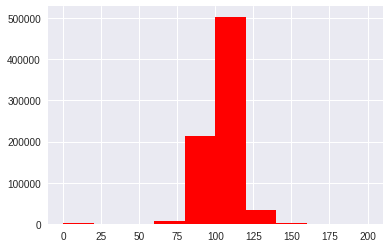

In [13]:
import seaborn as sns
#Visualising trade_price of trades
trades.trade_price.hist(range=(0,200),color="red")

### Summary
#### +Trade price lies in between 80 to 125 dollars.
#### +Shows peakedness.

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df_train['trade_price'].skew())
print("Kurtosis: %f" % df_train['trade_price'].kurt())

Skewness: -1.314060
Kurtosis: 17.924970


### Summary
#### It almost symmetric in distribution but is heavy-tailed.

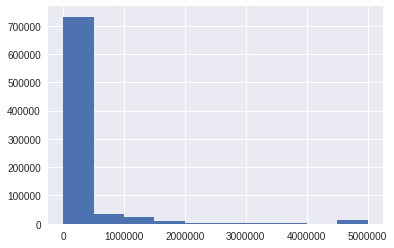

In [15]:
#Visualising trade size(notional amount) at which trade occured
trades.trade_size.hist()

In [16]:
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

In [17]:
trades = remove_outliers(df = trades, column = "trade_size", min_val = 0, max_val = 3000000)
trades['trade_size'].fillna(-1, inplace = True)
print("Fixing trade_price  column...completed")

Fixing trade_price  column...completed


### Summary
#### 90% of the trades have smaller size than 500,000 and there exists some large trade sizes.

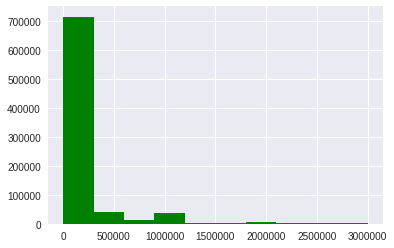

In [18]:
#Visualising trade size(notional amount) at which trade occured after removing outliers
trades.trade_size.hist(color='green')

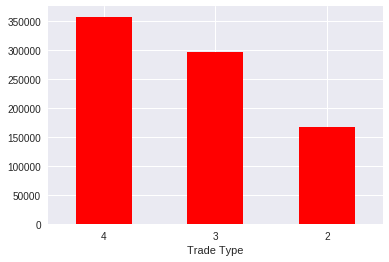

In [19]:
#Visualising trade type of trades
trades.trade_type.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('Trade Type')
sns.despine()

### Summary
#### 22% of the customers sells(2), 33% of the customers buys(3), 44% of trade happen between dealers(4). So much concentration can be laid on dealer part than the other.

#### Author - Anoop Ron
#### USN - 01FE15BCS030

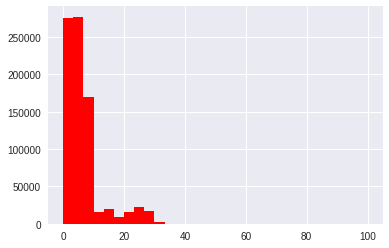

In [20]:
#Visualising time 0f maturity of trades
trades.time_to_maturity.hist(bins=30,range=(0,100),color="red")

### Summary
#### The time of maturity is less than 30 years for 98% of the bonds.

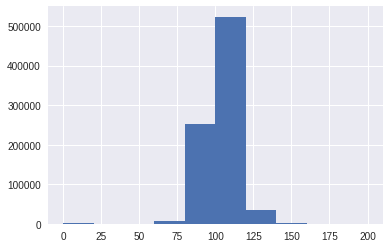

In [21]:
#Visualising curve_based_price of trades
trades.curve_based_price.hist(range=(0,200))

In [8]:
df_trades = remove_outliers(df = trades, column = "curve_based_price", min_val = 50, max_val = 170)
df_trades["curve_based_price"].fillna(-1, inplace = True)
print("Fixing curve_based_price  column...completed")

Fixing curve_based_price  column...completed


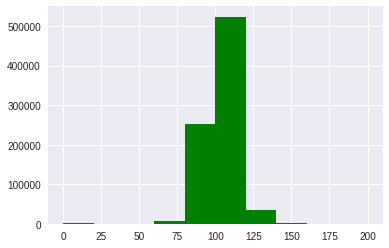

In [22]:
#Visualising curve_based_price of trades after removing outliers
trades.curve_based_price.hist(range=(0,200),color="green")

### Summary
#### Curve based price is almost in the range of trade price graph.

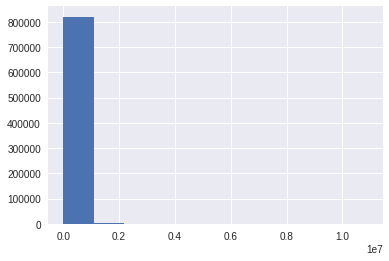

In [23]:
#Visualising recieved time difference last at which first transaction of the trade
trades.received_time_diff_last1.hist()

### Summary
#### We infer that about 99% of trades are uploaded within 850 seconds of the previous transaction. So we need to predict trade price early and get paid.

#### Author - Abhishek Patil
#### USN - 01FE15BCS006

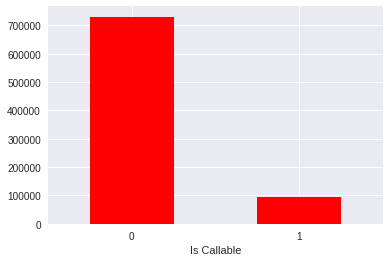

In [24]:
#Visualising the whether bond is callable or not
trades.is_callable.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('Is Callable')
sns.despine()

### Summary
#### 0 indicates the bond is not callable and 1 indicates that the bond is callable. So we infer that about 90% of the bonds are not callable.

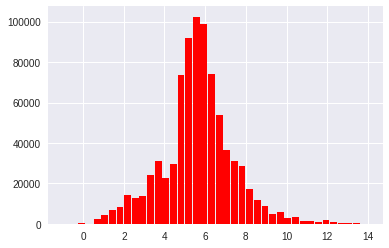

In [25]:
#Visualising the current coupon
trades.current_coupon.hist(label='Histogram',bins=40,range=(-1,14),rwidth=0.9,stacked=True,color="red")
#plt.xlabel('Current Coupon')
#sns.despine()

### Summary
#### The current coupon visualisation infers that most of the coupons lie in between 4.3 to 6.3.

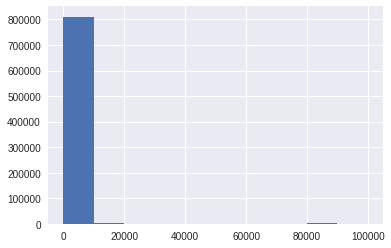

In [26]:
#Visualising the reporting delay
trades.reporting_delay.hist(range=(-5.858100e+01,9.987914e+04))

### Summary
#### We see that most of the values are clustered to left and some outliers exist.

In [27]:
trades = remove_outliers(df = trades, column = "reporting_delay", min_val = 0, max_val = 20000)
trades['reporting_delay'].fillna(-1, inplace = True)
print("Fixing reporting delay column...completed")


Fixing reporting delay column...completed


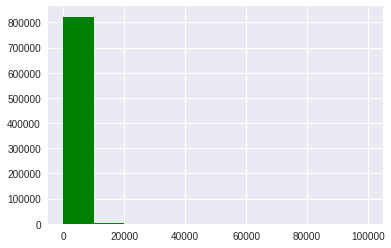

In [28]:
#Visualising the reporting delay
trades.reporting_delay.hist(range=(-5.858100e+01,9.987914e+04),color="green")

# Relation between the trade price and other variables

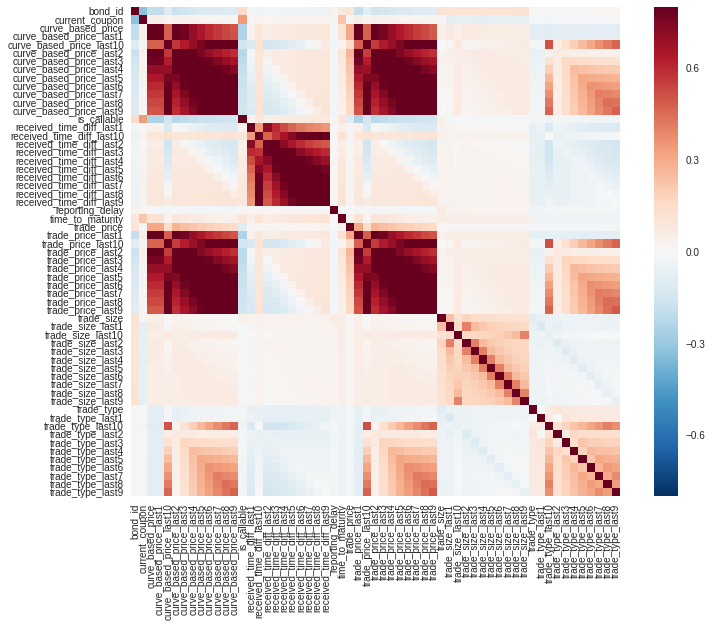

In [73]:
#correlation matrix
corrmat = trades.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Summary
### Curve based price is strongly corelated with the trade prices, there is also coorelation between trade type and trade price last.

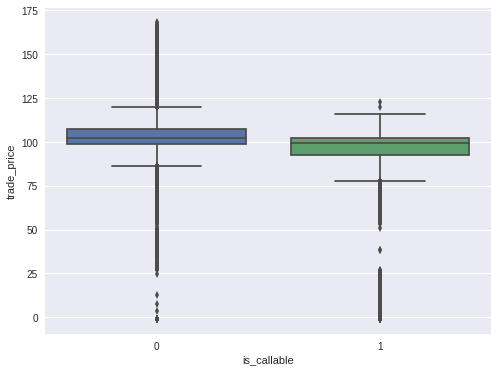

In [74]:
#box plot is_callable/trade_price
var = 'is_callable'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="trade_price", data=data)

## Summary
### 90% of the bonds with trade_price higher than 103 dollars are non_callable.

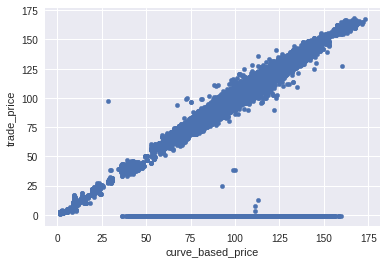

In [30]:
#scatter plot curve_based_price/trade_price
var = 'curve_based_price'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

## Summary
### Curve based price and trade price are positively corelated but some times zero credit will be shared between each other.

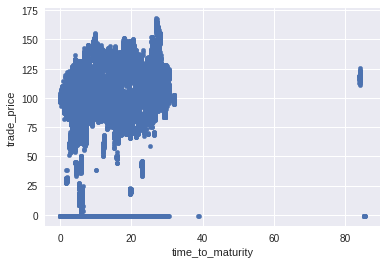

In [32]:
#scatter plot is_time_of_maturity/trade_price

var = 'time_to_maturity'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

## Summary
### It seems there is no coorelation between trade price as such.

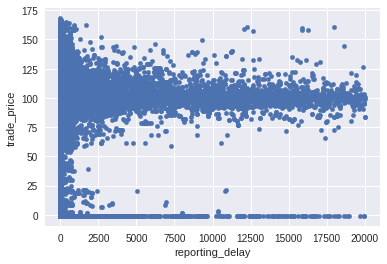

In [64]:
#scatter plot curve_based_price/trade_price
var = 'reporting_delay'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

## Summary
### It seems there is no coorelation between trade price as such.

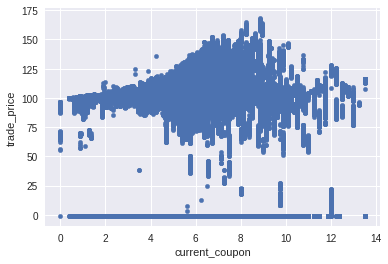

In [65]:
#scatter plot curve_based_price/trade_price
var = 'current_coupon'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

## Summary
### It seems there is no coorelation between trade price as such.

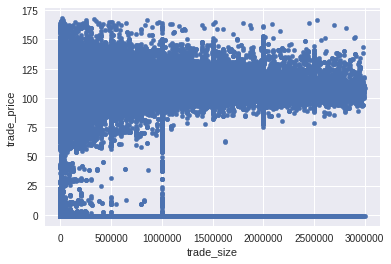

In [66]:
#scatter plot curve_based_price/trade_price
var = 'trade_size'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

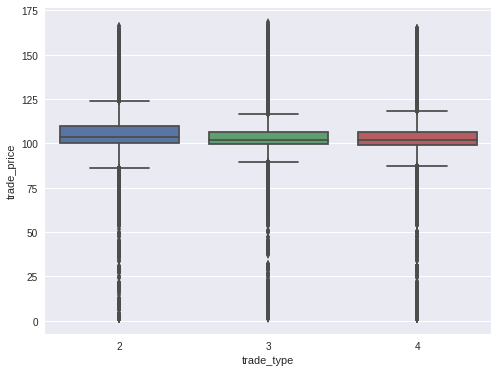

In [67]:
#box plot is_callable/trade_price
var = 'trade_type'
data = pd.concat([df_train['trade_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="trade_price", data=data)

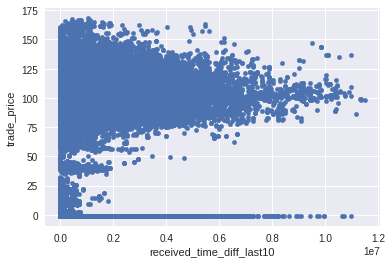

In [72]:
#scatter plot curve_based_price/trade_price
var = 'received_time_diff_last10'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');


## Summary 
###

# Building linear model
### Data Modelling

In [33]:
attributes = ['is_callable','curve_based_price_last1','curve_based_price_last2','curve_based_price_last3','curve_based_price_last4','curve_based_price_last5','curve_based_price','trade_price','trade_size','trade_type','received_time_diff_last10']
training_data=df_train
testing_data=df_test
data_new = trades
data_new.set_index('id', inplace=True)

training_data.set_index('id', inplace=True)
i=training_data.shape[0]
data_new = data_new[:i]

yy = data_new['trade_price']
XX = data_new.drop(attributes, axis=1, inplace=False)


In [34]:
import xgboost as xg

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2,  
                                                    random_state=42)


max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.6
objective = 'reg:linear'
num_estimators = 1000
learning_rate = 0.3

features = X_train
target = y_train
mdl = xg.XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
mdl.fit(features, target)

/home/hp/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=10, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

In [61]:
predicted=mdl.predict(X_test)
list(predicted)

[106.72444,
 101.51483,
 99.806458,
 107.80389,
 99.984428,
 100.4675,
 100.18454,
 99.175888,
 107.0042,
 108.85517,
 106.72049,
 99.157158,
 129.99501,
 122.10303,
 106.3746,
 104.97695,
 96.168449,
 97.707863,
 99.781326,
 130.12903,
 107.14412,
 101.16212,
 115.14298,
 100.56435,
 110.22577,
 99.624878,
 99.237389,
 89.356773,
 101.97028,
 96.514603,
 97.932167,
 96.947739,
 103.41628,
 101.66489,
 107.58274,
 113.16355,
 123.37601,
 95.350105,
 103.38084,
 105.05132,
 99.93779,
 90.801048,
 96.018288,
 104.97084,
 101.16991,
 105.19221,
 98.697739,
 86.062057,
 101.03825,
 102.37455,
 100.01018,
 129.7424,
 104.09161,
 117.36351,
 105.5604,
 102.23095,
 100.86369,
 98.755981,
 107.20958,
 99.897888,
 113.16085,
 126.54596,
 101.14349,
 106.20185,
 100.3302,
 94.676353,
 100.92734,
 101.22308,
 99.775337,
 103.41845,
 100.57628,
 112.04052,
 101.10593,
 104.31789,
 107.77557,
 105.54732,
 98.108528,
 95.976379,
 103.95612,
 106.02522,
 104.58993,
 104.3878,
 104.43189,
 116.16318,


In [39]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
r2_score(predicted, y_test)

0.98952978755961807

In [57]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predicted)

0.99021751169068817

### 2nd Model 

In [62]:
from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3,  
                                                    random_state=42)
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthread=-1)  

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(X_train, y_train) 



ans = gs.predict(X_test)

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
r2_score(ans, y_test)

KeyboardInterrupt: 